In [24]:
# import libraries 
import pandas as pd    # for data cleaning ,manipulation and handling dataframes .
import seaborn as sns  # for statistical visualizations .
import numpy as np     # for numerical operations and arrays .
import matplotlib      # for plotting graphs 
import matplotlib.pyplot as plt 
plt.style.use('ggplot')
from matplotlib.pyplot import figure 
%matplotlib inline
matplotlib.rcParams['figure.figsize']=(12,8)   # fixing the size of plot . 
#read in data 
df= pd.read_csv('movies.csv') # command to run your csv . 

# Data cleaning and correlation analysis 

In [2]:
df.columns      #lets look at data columns .

Index(['name', 'rating', 'genre', 'year', 'released', 'score', 'votes',
       'director', 'writer', 'star', 'country', 'budget', 'gross', 'company',
       'runtime'],
      dtype='object')

In [3]:
df.head(5)       # calling the data of first 5 rows .

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [4]:
 for col in df.columns:                       # running a loop for finding if there are any missing values .
    pct_missing = np.mean(df[col].isnull())
    print('{}-{}%'.format(col,pct_missing))     

name-0.0%
rating-0.010041731872717789%
genre-0.0%
year-0.0%
released-0.0002608242044861763%
score-0.0003912363067292645%
votes-0.0003912363067292645%
director-0.0%
writer-0.0003912363067292645%
star-0.00013041210224308815%
country-0.0003912363067292645%
budget-0.2831246739697444%
gross-0.02464788732394366%
company-0.002217005738132499%
runtime-0.0005216484089723526%


In [5]:
(df.isnull().sum() / len(df)) * 100      #other method 


name         0.000000
rating       1.004173
genre        0.000000
year         0.000000
released     0.026082
score        0.039124
votes        0.039124
director     0.000000
writer       0.039124
star         0.013041
country      0.039124
budget      28.312467
gross        2.464789
company      0.221701
runtime      0.052165
dtype: float64

In [6]:
df.dtypes    # data types of our columns 

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [7]:
df['budget'] = df['budget'].fillna(0).astype(int) # replace NaN with 0, then convert.
df['gross'] = df['gross'].fillna(0).astype(int)   



In [8]:
df['budget'] = df['budget'].astype('int64')   #change datatype of budget .

df['gross'] = df['gross'].astype('int64')

In [9]:
df['yearcorrect'] = df['released'].astype(str).str[:4] # correct year column.

In [10]:
df = df.sort_values(by= ['gross'],inplace = False , ascending = False)  #sorting the values .

In [11]:
pd.set_option('display.max_rows', None)              # display all data without limitation , maximum number of rows

In [12]:
df.drop_duplicates()     # drop any duplicate 
df.head(5)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,Dece
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,Apri
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,Dece
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,Dece
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,Apri


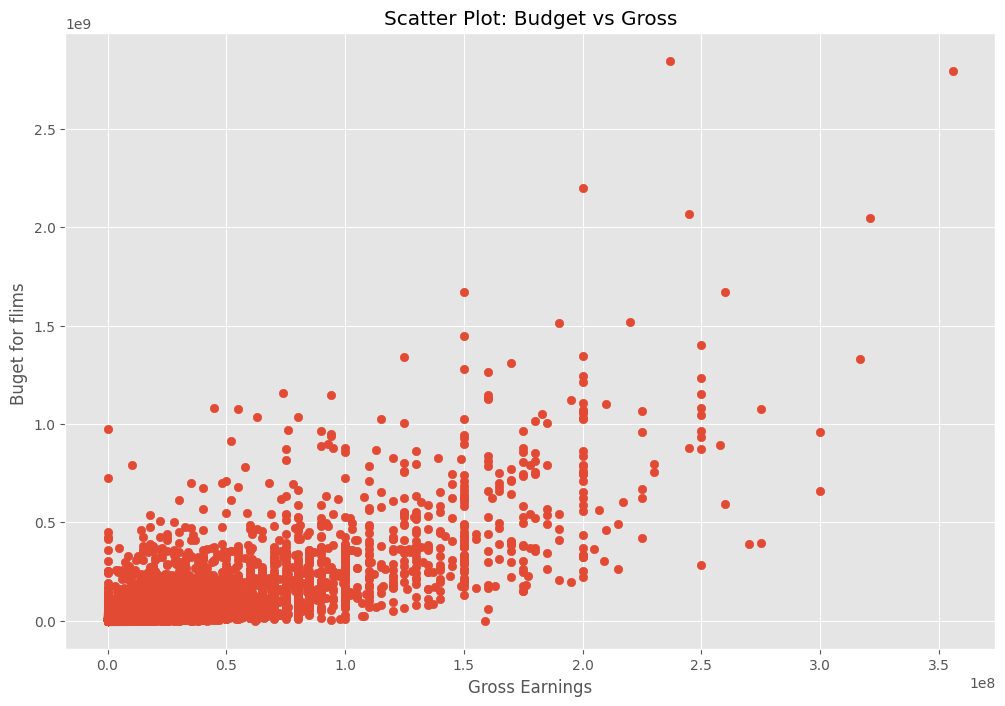

In [13]:
                 #scatter plot with budget vs gross 

plt.scatter(df['budget'], df['gross'])   # x = budget , y = gross
plt.title("Scatter Plot: Budget vs Gross")   # labeling title  .
plt.xlabel("Gross Earnings")                 # labeling  x-axis  
plt.ylabel("Buget for flims ")               # labeling x-axis

plt.show()

In [14]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,Dece
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,Apri
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,Dece
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,Dece
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,Apri


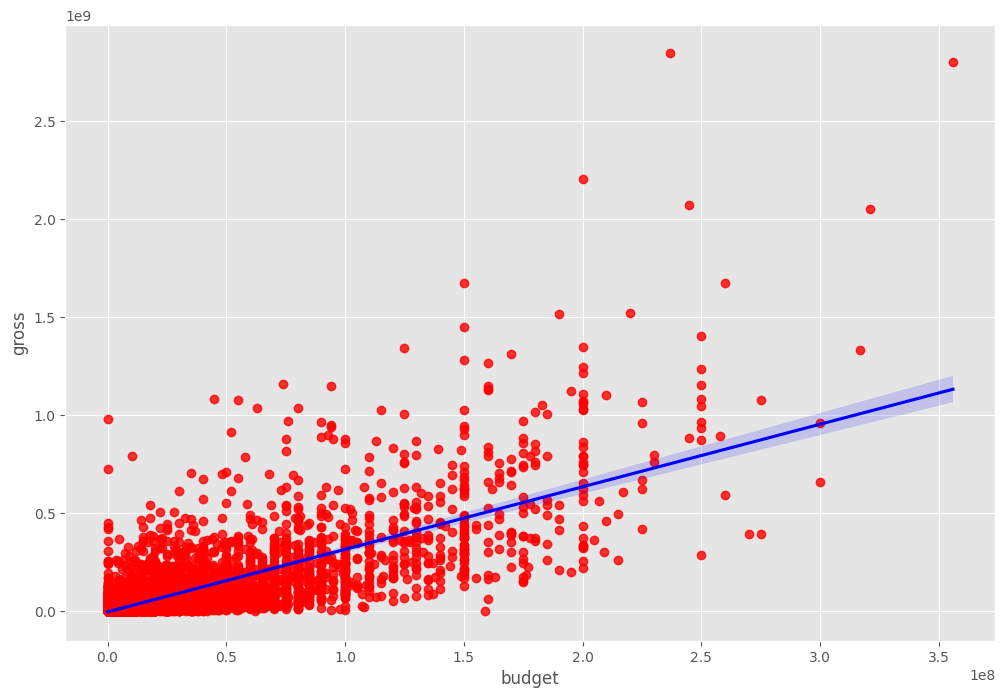

In [15]:
# plot the budget vs gross using seaborn

sns.regplot(
    x ='budget' , y ='gross' ,           # x = budget , y = gross 
    data = df ,
    scatter_kws={'color': 'red' } ,      # fixing colour of scatters and line . 
    line_kws={'color' : 'blue'})
plt.show()

In [29]:
#lets start looking at correlation 
df.corr( method = 'pearson' , numeric_only = True)     #pearson , kendall , spearman


,year,score,votes,budget,gross,runtime
year,1.000000,0.097995,0.222945,0.329321,0.257486,0.120811
score,0.097995,1.000000,0.409182,0.076254,0.186258,0.399451
votes,0.222945,0.409182,1.000000,0.442429,0.630757,0.309212
budget,0.329321,0.076254,0.442429,1.000000,0.740395,0.320447
gross,0.257486,0.186258,0.630757,0.740395,1.000000,0.245216
runtime,0.120811,0.399451,0.309212,0.320447,0.245216,1.000000


In [30]:
# high correlation betweem budget and gross 

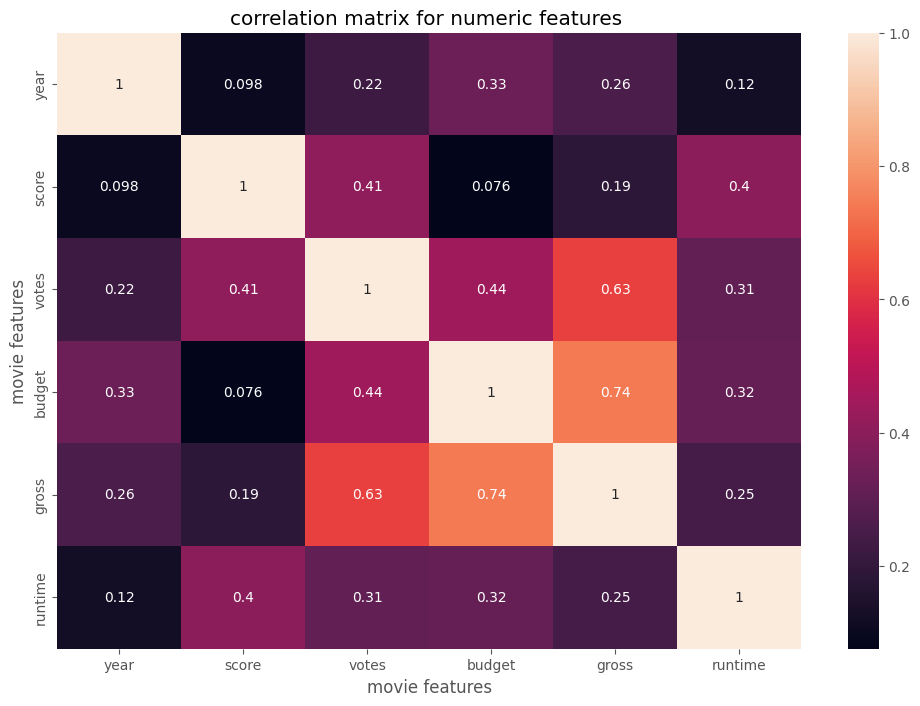

In [31]:
correlation_matrix = df.corr(method='pearson',numeric_only = True )
sns.heatmap(correlation_matrix , annot = True )
plt.title("correlation matrix for numeric features ")
plt.xlabel("movie features")
plt.ylabel("movie features")
plt.show()                                                        

In [32]:
#look at company 
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [33]:

df_numerized = df.copy()      # Make a copy of the original DataFrame (numerical version will be stored here) .
for col_name in df_numerized.columns: # Loop through all columns in the DataFrame .
    if(df_numerized[col_name].dtype =='object'): # Loop through all columns in the DataFrame .
        df_numerized[col_name]=df_numerized[col_name].astype('category') # Convert the column to 'category' type (helps with encoding text values) .
        df_numerized[col_name]=df_numerized[col_name].cat.codes #Replace the category labels with integer codes.  
df_numerized.head(5) # Show the first 5 rows of the numerized DataFrame    


        

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,6587,6,6,1980,1705,8.4,927000.0,2589,4014,1047,54,19000000.0,46998772.0,2319,146.0
1,5573,6,1,1980,1492,5.8,65000.0,2269,1632,327,55,4500000.0,58853106.0,731,104.0
2,5142,4,0,1980,1771,8.7,1200000.0,1111,2567,1745,55,18000000.0,538375067.0,1540,124.0
3,286,4,4,1980,1492,7.7,221000.0,1301,2000,2246,55,3500000.0,83453539.0,1812,88.0
4,1027,6,4,1980,1543,7.3,108000.0,1054,521,410,55,6000000.0,39846344.0,1777,98.0


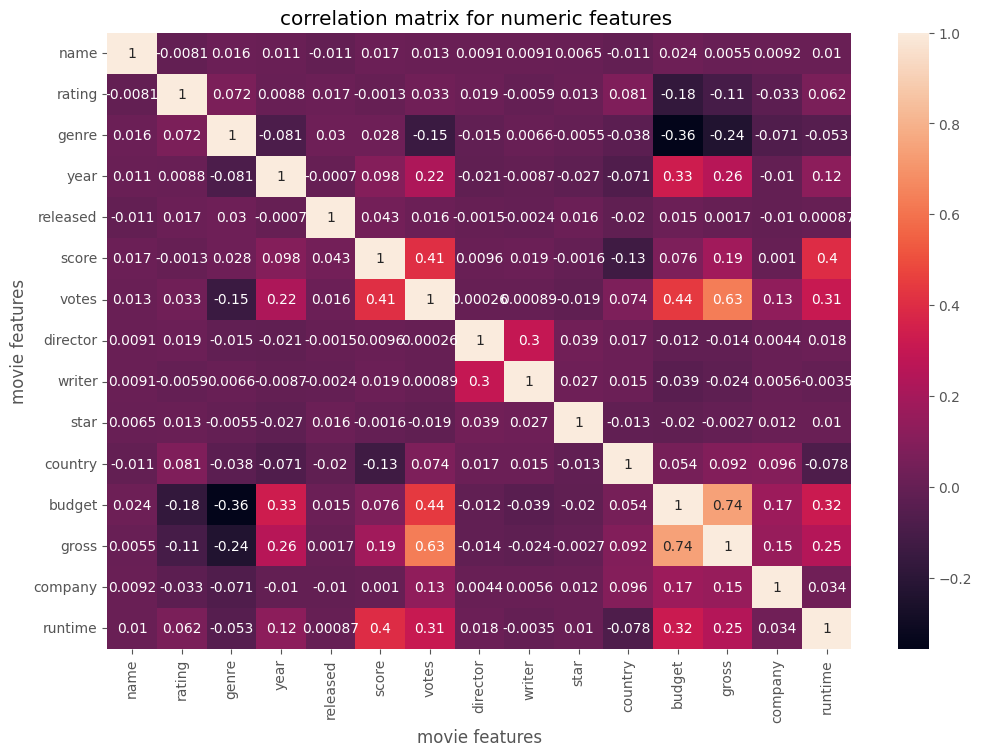

In [34]:
correlation_matrix = df_numerized.corr(method='pearson',numeric_only = True )  
sns.heatmap(correlation_matrix , annot = True )  # Plot a heatmap of the correlation matrix using seaborn . 
plt.title("correlation matrix for numeric features ") # Add a title to the plot
plt.xlabel("movie features")   # Label the X-axis and Y-axis
plt.ylabel("movie features")
plt.show()                     # Display the heatmap

In [35]:
df_numerized.corr()   # Compute the pairwise correlation between all numeric columns in the DataFrame .  

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
name,1.000000,-0.008069,0.016355,0.011453,-0.011311,0.017097,0.013088,0.009079,0.009081,0.006472,-0.010737,0.023970,0.005533,0.009211,0.010392
rating,-0.008069,1.000000,0.072423,0.008779,0.016613,-0.001314,0.033225,0.019483,-0.005921,0.013405,0.081244,-0.176002,-0.107339,-0.032943,0.062145
genre,0.016355,0.072423,1.000000,-0.081261,0.029822,0.027965,-0.145307,-0.015258,0.006567,-0.005477,-0.037615,-0.356564,-0.235650,-0.071067,-0.052711
year,0.011453,0.008779,-0.081261,1.000000,-0.000695,0.097995,0.222945,-0.020795,-0.008656,-0.027242,-0.070938,0.329321,0.257486,-0.010431,0.120811
released,-0.011311,0.016613,0.029822,-0.000695,1.000000,0.042788,0.016097,-0.001478,-0.002404,0.015777,-0.020427,0.014683,0.001659,-0.010474,0.000868
score,0.017097,-0.001314,0.027965,0.097995,0.042788,1.000000,0.409182,0.009559,0.019416,-0.001609,-0.133348,0.076254,0.186258,0.001030,0.399451
votes,0.013088,0.033225,-0.145307,0.222945,0.016097,0.409182,1.000000,0.000260,0.000892,-0.019282,0.073625,0.442429,0.630757,0.133204,0.309212
director,0.009079,0.019483,-0.015258,-0.020795,-0.001478,0.009559,0.000260,1.000000,0.299067,0.039234,0.017490,-0.012272,-0.014441,0.004404,0.017624
writer,0.009081,-0.005921,0.006567,-0.008656,-0.002404,0.019416,0.000892,0.299067,1.000000,0.027245,0.015343,-0.039451,-0.023519,0.005646,-0.003511
star,0.006472,0.013405,-0.005477,-0.027242,0.015777,-0.001609,-0.019282,0.039234,0.027245,1.000000,-0.012998,-0.019589,-0.002717,0.012442,0.010174


In [37]:
corr_matrix = df_numerized.corr()
corr_pairs = corr_matrix.unstack()  
sorted_pairs = corr_pairs.sort_values()  # Sort the correlation pairs

sorted_pairs      

genre     budget     -0.356564
budget    genre      -0.356564
gross     genre      -0.235650
genre     gross      -0.235650
rating    budget     -0.176002
budget    rating     -0.176002
votes     genre      -0.145307
genre     votes      -0.145307
country   score      -0.133348
score     country    -0.133348
rating    gross      -0.107339
gross     rating     -0.107339
year      genre      -0.081261
genre     year       -0.081261
country   runtime    -0.078412
runtime   country    -0.078412
company   genre      -0.071067
genre     company    -0.071067
year      country    -0.070938
country   year       -0.070938
runtime   genre      -0.052711
genre     runtime    -0.052711
writer    budget     -0.039451
budget    writer     -0.039451
genre     country    -0.037615
country   genre      -0.037615
company   rating     -0.032943
rating    company    -0.032943
year      star       -0.027242
star      year       -0.027242
gross     writer     -0.023519
writer    gross      -0.023519
director

In [38]:
high_corr = sorted_pairs[(sorted_pairs)>0.5]  # Display the high-correlation pairs
high_corr

votes     gross       0.630757
gross     votes       0.630757
budget    gross       0.740395
gross     budget      0.740395
released  released    1.000000
score     score       1.000000
rating    rating      1.000000
name      name        1.000000
genre     genre       1.000000
year      year        1.000000
director  director    1.000000
votes     votes       1.000000
writer    writer      1.000000
star      star        1.000000
budget    budget      1.000000
country   country     1.000000
gross     gross       1.000000
company   company     1.000000
runtime   runtime     1.000000
dtype: float64

In [ ]:
# votes and budget have the highest correlation to gross earnings . 
#comapny have low correlation .

# Discriptive Analysis 

                                            name         gross
5445                                      Avatar  2.847246e+09
7445                           Avengers: Endgame  2.797501e+09
3045                                     Titanic  2.201647e+09
6663  Star Wars: Episode VII - The Force Awakens  2.069522e+09
7244                      Avengers: Infinity War  2.048360e+09
7480                               The Lion King  1.670728e+09
6653                              Jurassic World  1.670516e+09
6043                                The Avengers  1.518816e+09
6646                                   Furious 7  1.515341e+09
7494                                   Frozen II  1.450027e+09


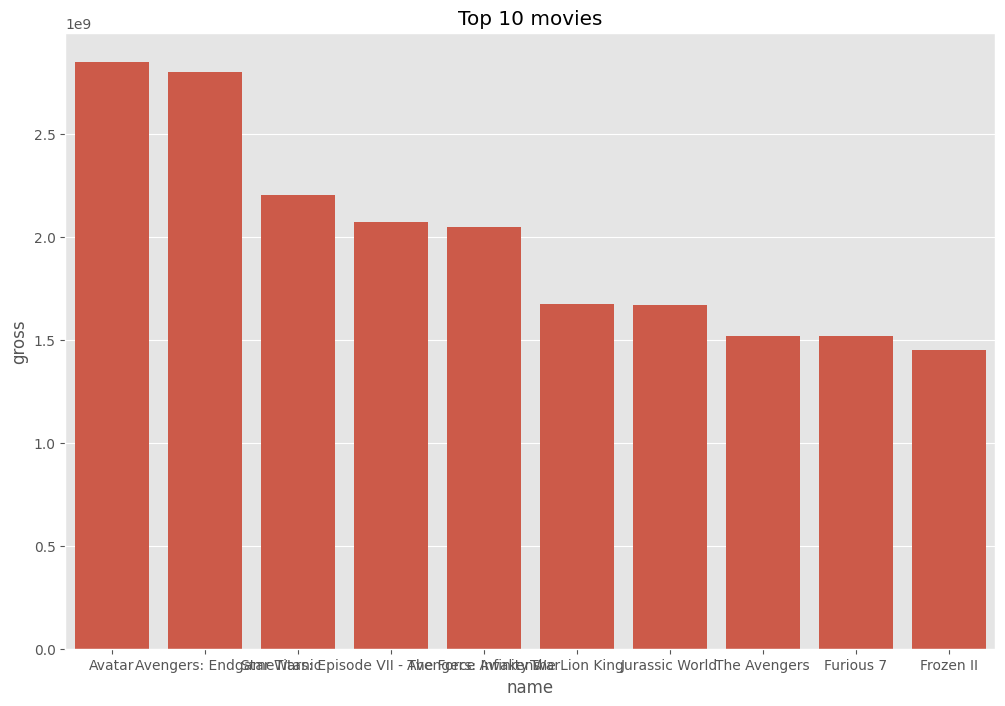

In [69]:
Top10 = df.sort_values(by= 'gross', ascending = False).head(10)
print(Top10[['name' , 'gross']])

#plot
sns.barplot(x= 'name', y= 'gross' , data =Top10 )
plt.title("Top 10 movies")
plt.xlabel('name')
plt.ylabel('gross')
plt.show()

genre
Comedy       2245
Action       1705
Drama        1518
Crime         551
Biography     443
Adventure     427
Animation     338
Horror        322
Fantasy        44
Mystery        20
Thriller       16
Family         11
Sci-Fi         10
Romance        10
Western         3
Musical         2
Music           1
History         1
Sport           1
Name: count, dtype: int64


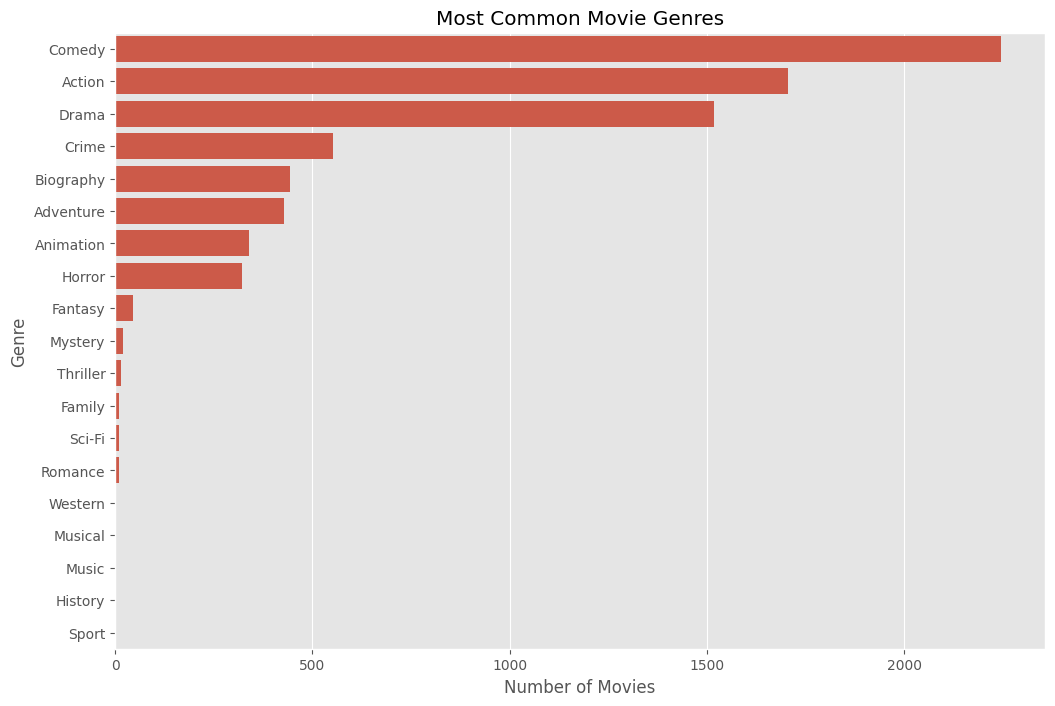

In [65]:
genre_counts = df['genre'].value_counts()     # genres sorted by desc
print(genre_counts)

#plot
sns.barplot(x=genre_counts.values, y=genre_counts.index)
plt.title("Most Common Movie Genres")
plt.xlabel("Number of Movies")
plt.ylabel("Genre")
plt.show()

                 budget         gross     runtime
genre                                            
Action     5.808460e+07  1.455086e+08  110.211268
Adventure  4.570839e+07  1.093252e+08  107.978923
Animation  7.578520e+07  2.392300e+08   92.204142
Biography  2.531232e+07  4.787432e+07  119.880361
Comedy     2.260780e+07  4.433187e+07  101.491759
Crime      2.236357e+07  3.940120e+07  111.752727
Drama      2.291461e+07  3.893096e+07  112.974934
Family     5.112500e+07  1.961725e+08   99.909091
Fantasy    1.688571e+07  3.870933e+07   99.363636
History    3.235620e+05           NaN   55.000000
Horror     1.282516e+07  4.737241e+07   96.304348
Music               NaN  1.100140e+05  117.000000
Musical             NaN  2.595346e+06  145.000000
Mystery    3.187647e+07  1.011835e+08  115.750000
Romance    2.404000e+07  2.354937e+07  106.600000
Sci-Fi     1.973375e+07  3.256123e+07  100.300000
Sport               NaN  1.067629e+06   94.000000
Thriller   1.051111e+07  2.693526e+07   98.625000


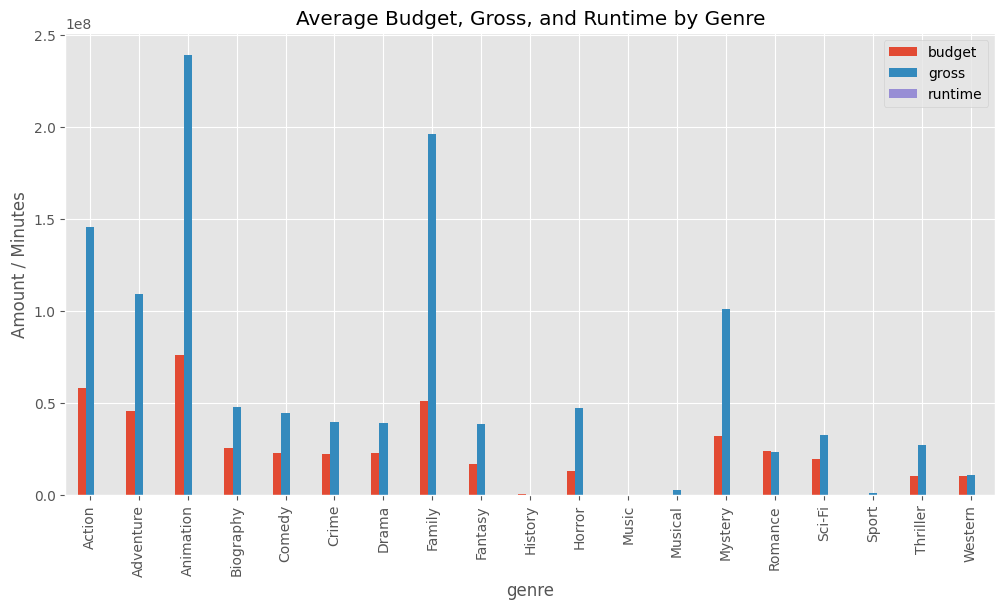

In [66]:
genre_stats = df.groupby('genre')[['budget', 'gross', 'runtime']].mean()  #average budget, gross, runtime by genre
print(genre_stats)

#plot
genre_stats.plot(kind='bar', figsize=(12,6))
plt.title("Average Budget, Gross, and Runtime by Genre")
plt.ylabel("Amount / Minutes")
plt.show()


country
United States     5475
United Kingdom     816
France             279
Canada             190
Germany            117
Australia           92
Japan               81
India               62
Italy               61
Spain               47
Name: count, dtype: int64


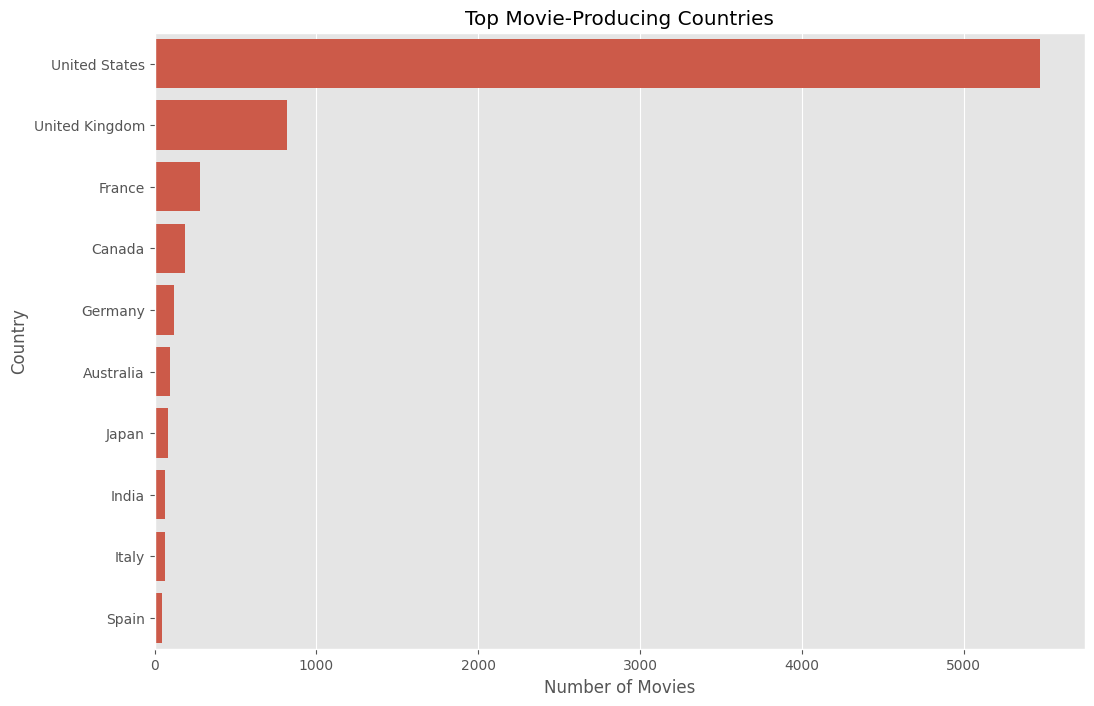

In [61]:
country_prouduce = df['country'].value_counts().head(10) #Countries producing the most movies
print(country_prouduce) 

# plot
sns.barplot(x=country_prouduce.values, y=country_prouduce.index)
plt.title("Top Movie-Producing Countries")
plt.xlabel("Number of Movies")
plt.ylabel("Country")
plt.show()

director
Woody Allen          38
Clint Eastwood       31
Directors            28
Steven Spielberg     27
Ron Howard           24
Ridley Scott         23
Steven Soderbergh    23
Joel Schumacher      22
Barry Levinson       20
Martin Scorsese      19
Name: count, dtype: int64


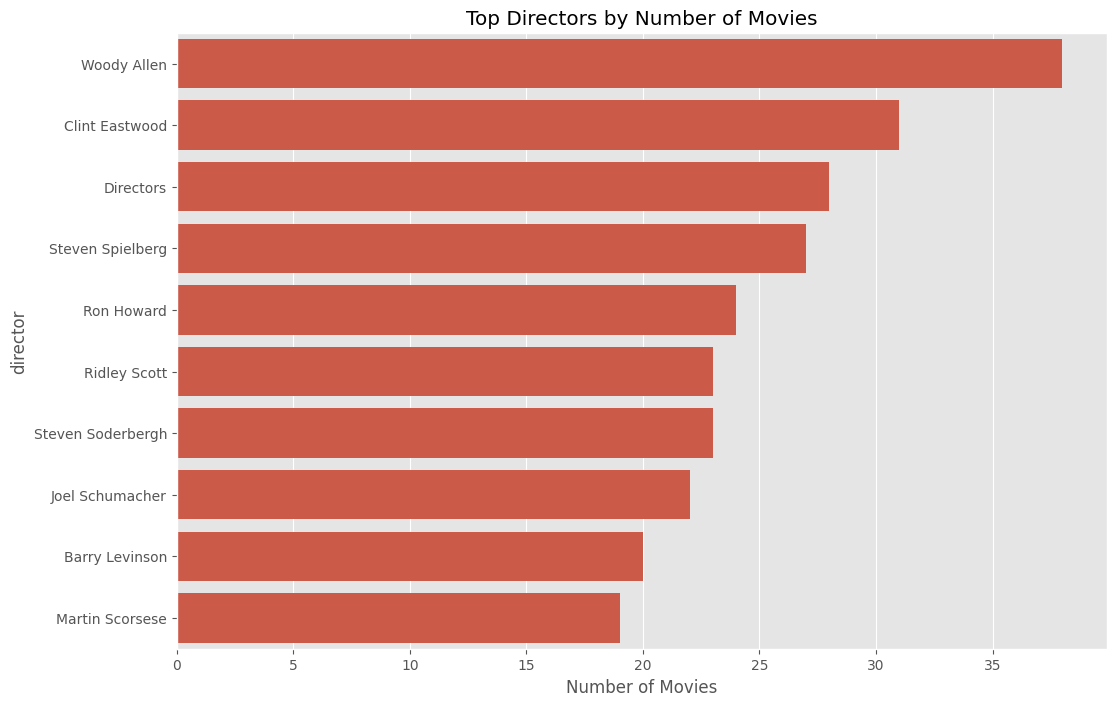

In [56]:
top_directors = df['director'].value_counts().head(10)   # Top production companies with movies
print(top_directors)

#plot 
sns.barplot(x=top_directors.values, y=top_directors.index)
plt.title("Top Directors by Number of Movies")
plt.xlabel("Number of Movies")
plt.show()

company
Universal Pictures           377
Warner Bros.                 334
Columbia Pictures            332
Paramount Pictures           320
Twentieth Century Fox        240
New Line Cinema              174
Touchstone Pictures          132
Metro-Goldwyn-Mayer (MGM)    125
Walt Disney Pictures         123
TriStar Pictures              94
Name: count, dtype: int64


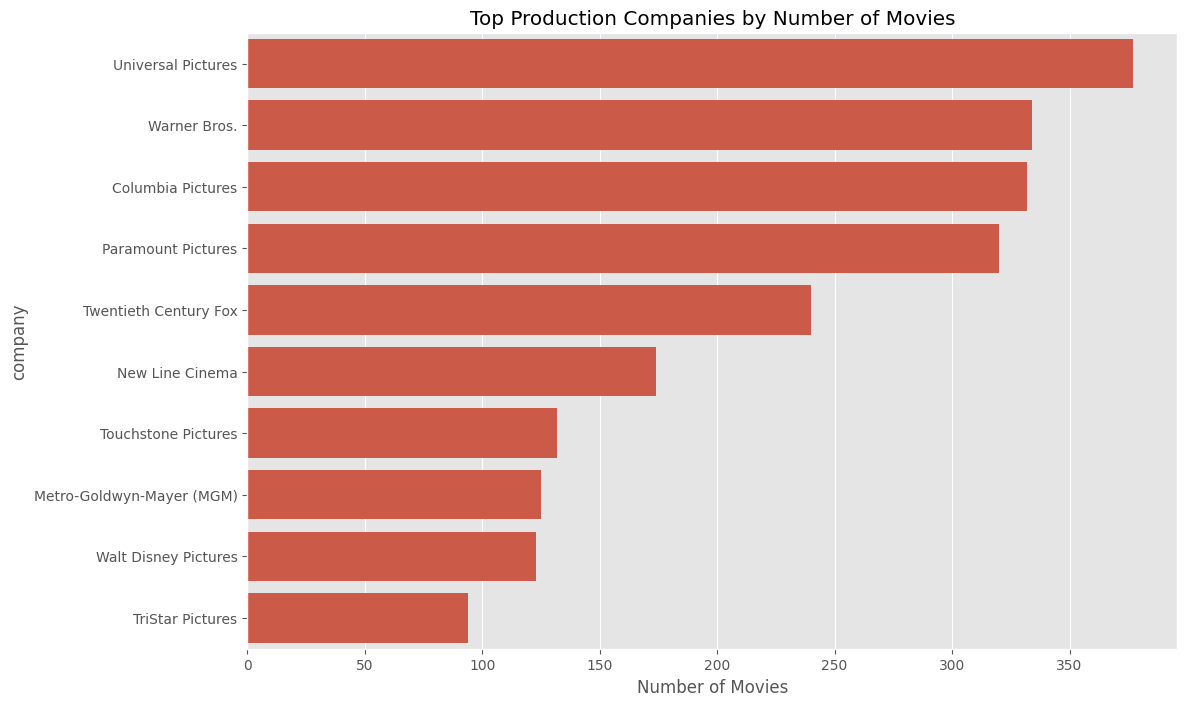

In [58]:
top_companies = df['company'].value_counts().head(10)    # Top production companies with movies
print(top_companies)

# plot 
sns.barplot(x=top_companies.values, y=top_companies.index)
plt.title("Top Production Companies by Number of Movies")
plt.xlabel("Number of Movies")
plt.show()                                                  

                                                  

In [ ]:
# Dataset and correlation analysis done afted getting inpired from Alex the Analyst .
# Descriptive and Exploratory data analysis done by myself .